# CDO testing

This notebook runs the teleconnection diagnostics written with cdo python bindings

In [1]:
import sys
from aqua import Reader
from aqua.util import get_config_dir, get_machine

# import teleconnections modules
sys.path.insert(1, '/work/bb1153/b382289/AQUA/diagnostics/teleconnections/')
from cdotesting import station_based_cdo, regional_mean_cdo
from tools import load_namelist
from plots import simple_plot

In [2]:
# Teleconnection config details
diagname  = 'teleconnections'
configdir = get_config_dir()
machine   = get_machine(configdir=configdir)
loglevel = 'INFO'

# Opening yaml files
namelist = load_namelist(diagname)

## NAO

In [3]:
# Configuration specific to the NAO teleconnection
telecname = 'NAO'
fieldname = namelist[telecname]['field']

model = 'ERA5'
exp  = 'era5'
source = 'monthly'

reader = Reader(model=model, exp=exp, source=source,regrid='r100')

# Retrieving the data
data = reader.retrieve(var=fieldname)
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/nao_test.nc')

2023-06-08 10:27:25 :: cdo station based index :: INFO     -> Evaluating station based index for NAO with cdo bindings
2023-06-08 10:27:27 :: cdo station based index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-08 10:27:27 :: cdo station based index :: INFO     -> Station 1: lon = 334.3, lat = 37.7
2023-06-08 10:27:27 :: cdo station based index :: INFO     -> Station 2: lon = 338, lat = 64.1
2023-06-08 10:27:31 :: cdo station based index :: INFO     -> Index evaluation completed


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='NAO index'>)

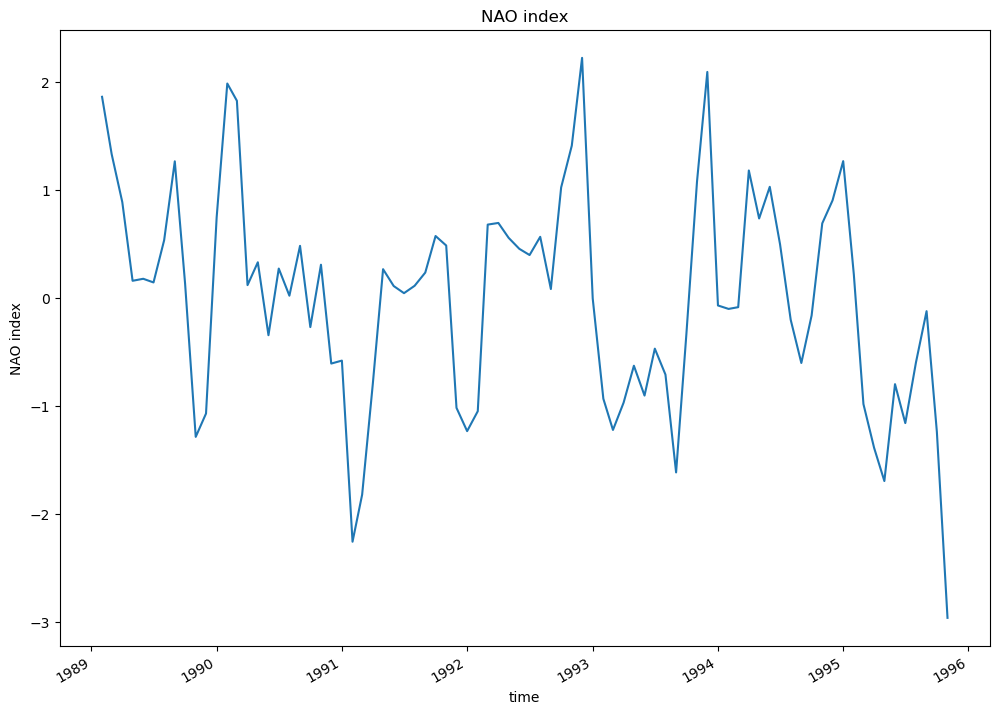

In [4]:
test = station_based_cdo('../data/nao_test.nc',namelist,telecname,loglevel=loglevel)
simple_plot(test[fieldname],title='NAO index',xlabel='time',ylabel='NAO index')

## ENSO

In [5]:
# Configuration specific to the ENSO teleconnection
telecname = 'ENSO'
fieldname = namelist[telecname]['field']

# Retrieving the data
data = reader.retrieve(var=fieldname)
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/enso_test.nc')

2023-06-08 10:27:33 :: cdo regional mean index :: INFO     -> Evaluating regional mean index for ENSO with cdo bindings
2023-06-08 10:27:33 :: cdo regional mean index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-08 10:27:33 :: cdo regional mean index :: INFO     -> Box coordinates: lonW = 190, lonE = 240, latN = 5, latS = -5
2023-06-08 10:27:35 :: cdo regional mean index :: INFO     -> Index evaluation completed


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO index'}, xlabel='time', ylabel='Specified sea surface\ntemperature [deg C]'>)

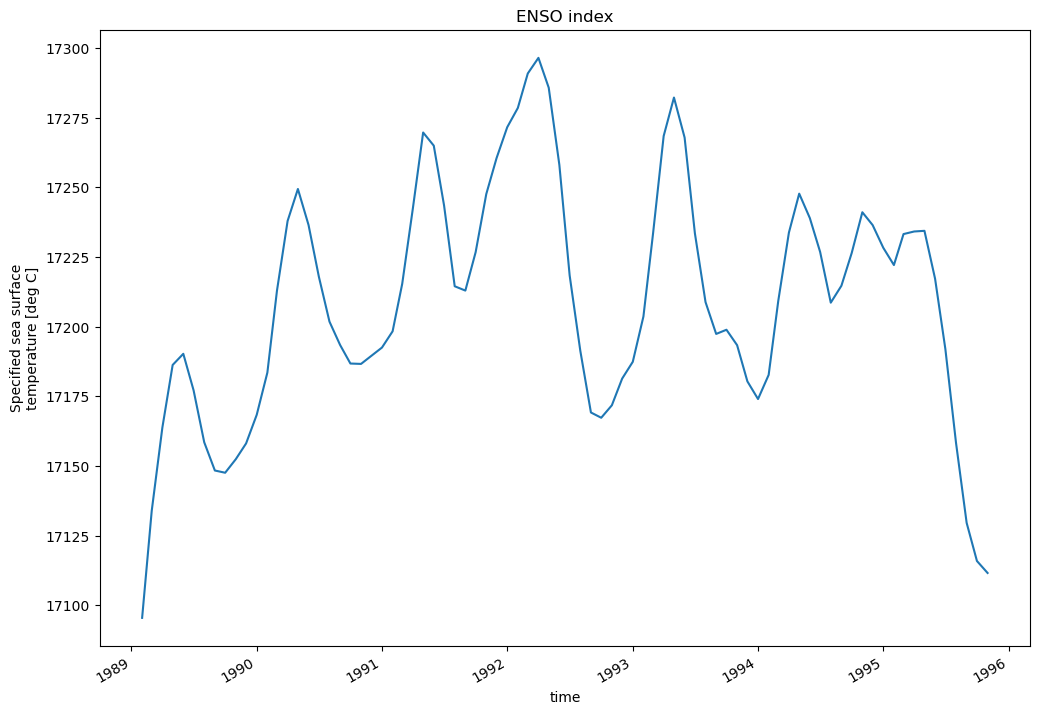

In [6]:
test = regional_mean_cdo('../data/enso_test.nc',namelist,telecname,loglevel=loglevel)
simple_plot(test[fieldname],title='ENSO index',xlabel='time')